# Необходимые библиотеки

In [26]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Модель

In [27]:
vae = VAEUtils(directory='models/zinc_properties')

Using standarized functions? True
Standarization: estimating mu and std values ...done!


# Первая формула

In [28]:
smiles = mu.canon_smiles('Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1')


smiles_to_hot = vae.smiles_to_hot(smiles,canonize_smiles=True)
z_1 = vae.encode(smiles_to_hot)
X_r= vae.decode(z_1)


print('{:20s} : {}'.format('Input',smiles))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))
print()

qed, SAS, logP  = vae.predict_prop_Z(z_1)[0]
print('Properties')
print('{:7s}:{}'.format('- qed',qed))
print('{:7s}:{}'.format('- SAS', SAS))
print('{:7s}:{}'.format('- logP', logP))

Input                : Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1
Reconstruction       : C(cccc(-](=OC(NC(=O)Nc3ccccc32)cc1
Z representation     : (1, 196) with norm 10.278

Properties
- qed  :0.7231325507164001
- SAS  :2.410372495651245
- logP :3.1467232704162598


In [ ]:
noise=3.0
print('Случайные молекулы находящиеся в {:.2f} стандартных отклонениях от точки'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df

In [29]:
smiles = mu.canon_smiles('CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C')


smiles_to_hot = vae.smiles_to_hot(smiles,canonize_smiles=True)
z_1 = vae.encode(smiles_to_hot)
X_r= vae.decode(z_1)


print('{:20s} : {}'.format('Input',smiles))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))
print()

qed, SAS, logP  = vae.predict_prop_Z(z_1)[0]
print('Properties')
print('{:7s}:{}'.format('- qed',qed))
print('{:7s}:{}'.format('- SAS', SAS))
print('{:7s}:{}'.format('- logP', logP))

Input                : CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
Reconstruction       : CN(C)cccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
Z representation     : (1, 196) with norm 13.424

Properties
- qed  :0.8115883469581604
- SAS  :2.219855308532715
- logP :2.4382758140563965


In [ ]:
noise=3.0
print('Случайные молекулы находящиеся в {:.2f} стандартных отклонениях от точки'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df

In [30]:
smiles = mu.canon_smiles('COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1')


smiles_to_hot = vae.smiles_to_hot(smiles,canonize_smiles=True)
z_1 = vae.encode(smiles_to_hot)
X_r= vae.decode(z_1)


print('{:20s} : {}'.format('Input',smiles))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))
print()

qed, SAS, logP  = vae.predict_prop_Z(z_1)[0]
print('Properties')
print('{:7s}:{}'.format('- qed',qed))
print('{:7s}:{}'.format('- SAS', SAS))
print('{:7s}:{}'.format('- logP', logP))

Input                : COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
Reconstruction       : COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
Z representation     : (1, 196) with norm 13.105

Properties
- qed  :0.7531525492668152
- SAS  :2.4784982204437256
- logP :0.0503462553024292


Случайные молекулы находящиеся в 3.00 стандартных отклонениях от точки
Found 4 unique mols, out of 55
SMILES
 0    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
1    COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NN)cn2)CC1
2    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NC)cn2)CC1
3    COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NC)cn2)CC1
Name: smiles, dtype: object


RDKit ERROR: [20:33:04] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [20:33:04] SMILES Parse Error: syntax error while parsing: COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1
RDKit ERROR: [20:33:04] SMILES Parse Error: Failed parsing SMILES 'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1' for input: 'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1'
RDKit ERROR: [20:33:04] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [20:33:04] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [20:33:04] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [20:33:04] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 19 20 21
RDKit ERROR: 
RDKit ERROR: [20:33:04] SMILES Parse Error: syntax error while parsing: COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)N=O)n2)C@1
RDKit ERROR: [20:33:04] SMILES Parse Error: Failed parsing SMILES 'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)N=O)n2)C@1' for input: 'COC(=O)C1CCC(Oc2ccc

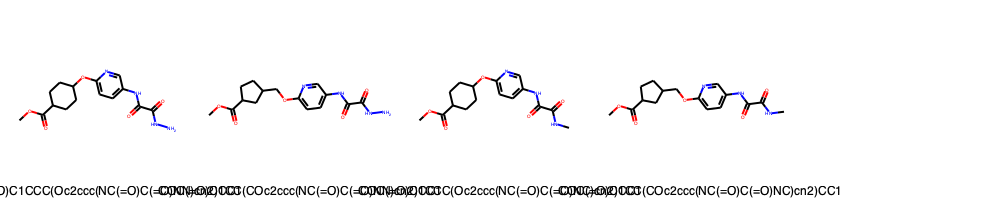

,smiles,distance,count,frequency,mol
0,COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1,0.000008,42,0.763636,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NN)cn2)CC1,8.869821,2,0.036364,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NC)cn2)CC1,14.754904,10,0.181818,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NC)cn2)CC1,15.489749,1,0.018182,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [33]:
noise=3.0
print('Случайные молекулы находящиеся в {:.2f} стандартных отклонениях от точки'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df